In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('HIV.csv')
df.head()

,Date,Title,article
0,"May 22, 2001, 12:40 IST",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001, 15:19 IST","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001, 23:36 IST",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001, 23:19 IST",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Seema Kamdar,Aug 15, 2001, 01:23 IST",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [3]:
df.dropna(how='any', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df['Date'] = df['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3}\s[0-9]{1,2},\s[0-9]{4}', x))

In [5]:
df.head()

,Date,Title,article
0,"[May 22, 2001]",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"[May 28, 2001]","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"[Aug 13, 2001]",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"[Aug 7, 2001]",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"[Aug 15, 2001]",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [6]:
type(df['Date'][0])

list

In [7]:
df['Date'] = df.Date.apply(', '.join)
df.head()

,Date,Title,article
0,"May 22, 2001",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Aug 15, 2001",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [8]:
df['Date'] = df['Date'].str.replace(',','').astype('str')
df.head()

,Date,Title,article
0,May 22 2001,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,May 28 2001,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,Aug 13 2001,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,Aug 7 2001,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,Aug 15 2001,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [9]:
#df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d %Y').strftime('%d/%m/%Y'))
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d %Y'))
df.head()

,Date,Title,article
0,2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df = df.reset_index(drop=True).set_index('Date')

In [12]:
df.head()

,Title,article
Date,,
2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [13]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
#df.groupby(df['Date'].dt.strftime('%B'))['Title'].count().sort_values()
df.index = pd.to_datetime(df.index)

In [15]:
df1 = df.resample('AS').count()
df1.head()

,Title,article
Date,,
2001-01-01,27,27
2002-01-01,82,82
2003-01-01,95,95
2004-01-01,59,59
2005-01-01,58,58


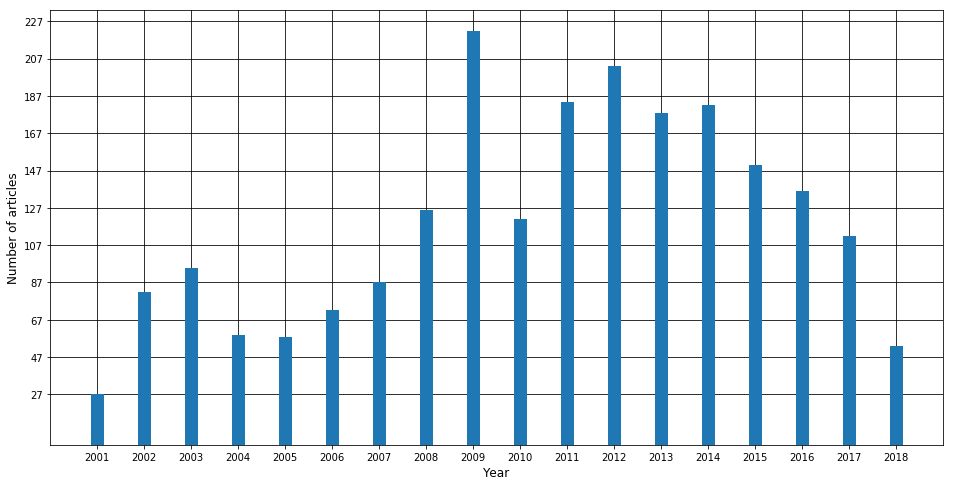

In [16]:
# Yearly Plot
fig, ax = plt.subplots(figsize=(16, 8))
plt.yticks(np.arange(df1['Title'].min(), df1['Title'].max()+20, 20))
plt.xticks(df1.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.grid(True)
ax.grid(color='black', zorder=0)
ax.bar(df1.index, df1['Title'], width = 100, zorder=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.show()

In [17]:
df = df.resample('M').count()

In [18]:
df.head()

,Title,article
Date,,
2001-05-31,2,2
2001-06-30,0,0
2001-07-31,0,0
2001-08-31,6,6
2001-09-30,1,1


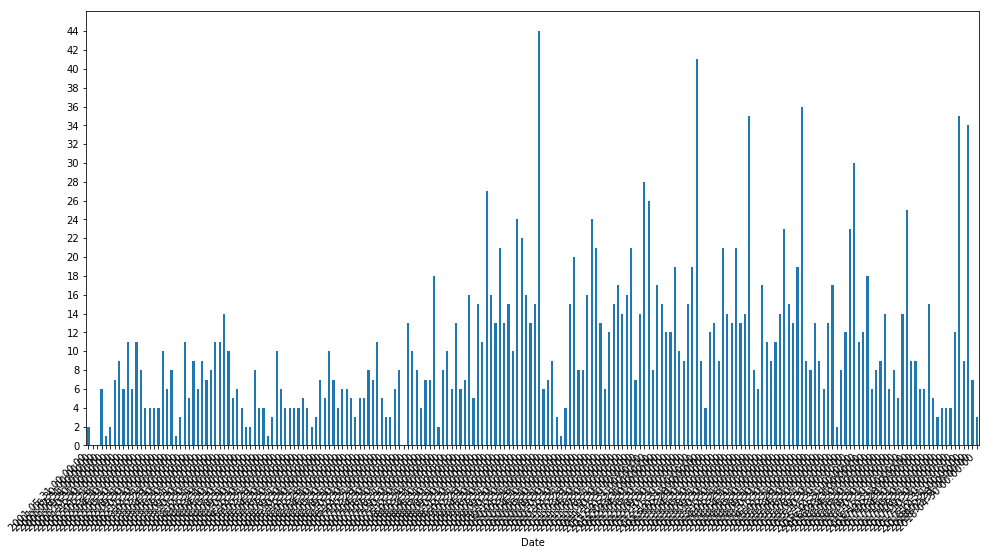

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
plt.yticks(np.arange(df['Title'].min(), df['Title'].max()+1, 2))
df['Title'].plot(ax=ax,kind='bar')
ax.xaxis.set_ticklabels(df.index)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

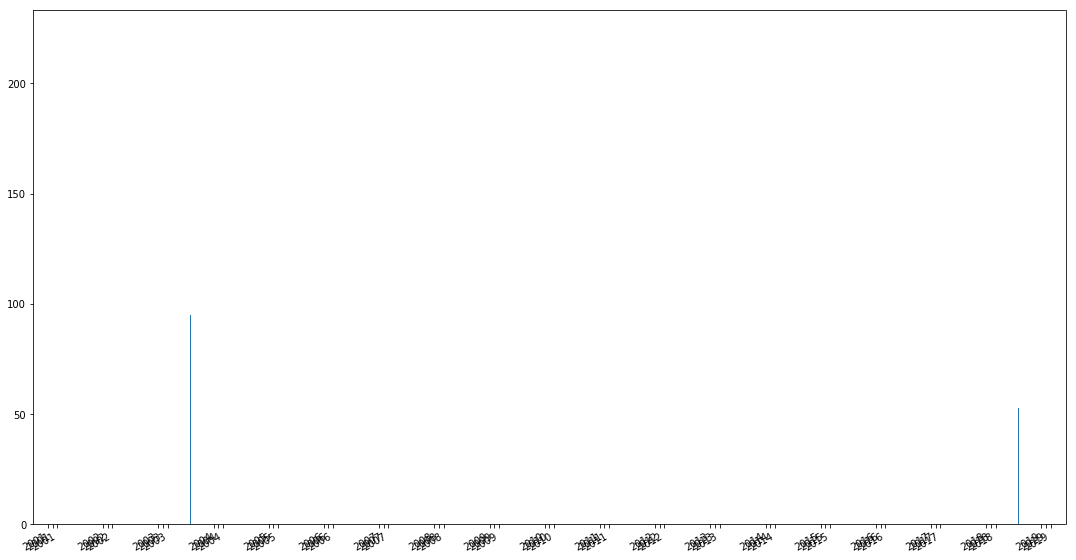

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(df1.index, df1['Title'])
loc = matplotlib.dates.MonthLocator([6,7,8])
fmt =  matplotlib.dates.DateFormatter("%Y")
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()